Question 1
==========

Note that for a given parameter, all probabilities end up to a total of 1; $\sum_Ω P(E_i) = 1$.

$$P(Positive|Allergy) = P(+|A) = 0.9$$
$$\implies P(-|A) = 1 - P(+|A) = 0.1$$

$$P(+|\neg A) = 0.15$$
$$\implies P(-|\neg A) = 0.85$$

$$P(A) = 0.03$$
$$\implies P(\neg A) = 0.97$$

a)
--
Find the probability that the test gives a positive result regardless of parameters. $P(+)$ = sum of all positive events occuring under some parameters multiplied by the probability of such parameter occuring:

$$
P(+) = P(+|A)P(A) + P(+|\neg A)P(\neg A)
\\ = 0.1725
$$

b)
--
Find the probability that given the parameter of a negative result, the child is allergic. 

$$
P(A|-) = P(-|A)\frac{P(A)}{P(-)} \approx 0.003
$$

c)
--
Find the probability that given the parameter of a positive result, the child is not allergic. Recall the method that $P(\neg A) = P(\neg A|+)P(+) + P(\neg A|-)P(-)$, rearrange for $P(\neg A|+)$, where $P(\neg A|-) = 1 - P(A|-)$.

$$
P(\neg A|+) = \frac{P(\neg A) - [1 - P(A|-)]P(-)}{P(+)} \approx 0.84
$$

Could also use the method $P(\neg A|+) = P(+|\neg A)P(\neg A)/P(+)$ which also gives $~0.84$, however the methods do not give the same exact value.

d)
--
Find the probability that the the tests correctly classify the child. As in, the probability of both true positives and negatives.


$$
P(correct) = P(-|\neg A)P(\neg A) + P(+|A)P(A) = 0.8515
$$

In [1]:
## a)
# P_A = P(+|A)
# N_nA = P(-\non-A)
P_A = 0.9
N_A = 1 - P_A

P_nA = 0.15
N_nA = 1 - P_nA

A = 0.03
nA = 1 - A

P = P_A*A + P_nA*nA
N = 1 - P
print(f'P(+) = {P}')

## b)
# A_N = P(A|-)
A_N = N_A*A/N
print(f'P(A|-) = {A_N}')

## c)
bayes_nA_P = P_nA*nA/P
print(f'P(nA|+), previous method = {bayes_nA_P}')
#compare to method done in lectures
nA_N = 1 - A_N
nA_P = (nA - nA_N*N)/P
print(f'P(nA|+) = {nA_P}')
## d)
correct = P_A*A + N_nA*nA
print(f'Correct classification rate = {correct}')

P(+) = 0.1725
P(A|-) = 0.003625377643504531
P(nA|+), previous method = 0.8434782608695652
P(nA|+) = 0.843478260869565
Correct classification rate = 0.8515


Question 2
==========
Consider a random Gaussian PDF, $f(x;\mu,\sigma)$, with $\mu = 90$ and $\sigma = 42.5$.

a)
--
Probability of $x \leq 100$ for such a Gaussian is $p(x \leq 100) = 0.59$, where $p(x)$ is the CPF over some bounds. Found by using the CDF function, which finds the probability of values below at a given $x$ value.

b)
--
Probability of $x > 110$ is equivalent of $ 1 - p(x \leq 110)$. Thus, $f(x > 110) = 0.32$, as $p(x \leq 110) = 0.68$.

c)
--
Expectation value $\sigma^2 = \int^{200}_0(x-\mu)^2f(x)dx$, where $f(x)$ is the PDF. This is the varience. Using the expect() function in python with a lambda $x^2$ function gives $\sigma^2 \approx 9674.54$ between $x \in [0,200]$.

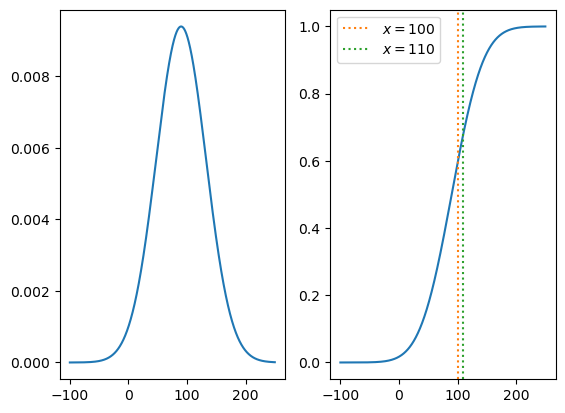

Probability that x <= 100: 0.59
Probability that x > 110: 0.32
<x^2> between [0,200]: 9678.54


In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

mean = 90
std = 42.5
x = np.arange(-100, 250, 0.001)

Gauss = norm.pdf(x, mean, std)
Int_Gauss = norm.cdf(x,mean,std) 
plt.subplot(121)
plt.plot(x, Gauss)
plt.subplot(122)
plt.plot(x,Int_Gauss)
plt.axvline(x=100, ls=':',color='tab:orange', label = '$x=100$')
plt.axvline(x=110, ls=':',color='tab:green', label = '$x=110$')
plt.legend()
plt.show()

## a) 
prob = norm.cdf(100, mean, std)
print(f'Probability that x <= 100: {round(prob,2)}')

## b)
prob = norm.cdf(110, mean, std)
prob = 1 - prob
print(f'Probability that x > 110: {round(prob,2)}')

## c)
ex = norm.expect(lambda x: x**2, loc=mean, scale=std, lb=0, ub=200)
print(f'<x^2> between [0,200]: {round(ex, 2)}')

Question 3
==========

Variable $x$ double Gaussian PDF of the form:

$$
N(x;\mu,\sigma_1,\sigma_2,a) = aN(x;\mu,sigma_1) + (1-a)N(x;\mu,sigma_2)
$$

Where $\mu = 12$, $a = 0.6$, $\sigma_1 = 1$, $\sigma_2 = 5$

a)
--
The plotted PDF is given below for $x \ in [0,24]$.

b)
--
Since the CDF is the integral of the probability density over given bounds, formulate a function in Python which takes a large lower bound and the upper bound as input. This would give the probability for a given $x_0$ for $x < x_0$. For $x > 10$, this gives $1 - p(x < 10) \implies p(x > 10) = 0.85$.

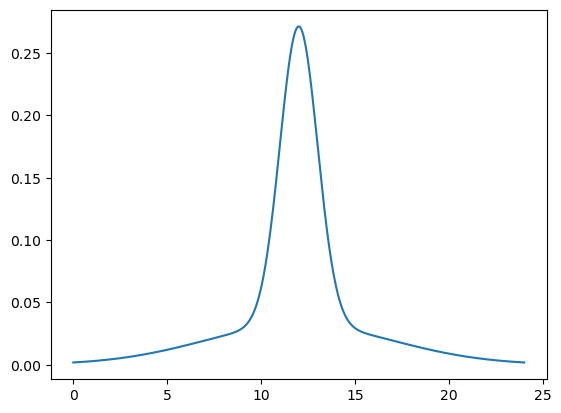

Integrate the PDF for x > 10: 0.85


In [3]:
mean = 12
std1 = 1
std2 = 5
a = 0.6

def double_gauss(x):
    return a * norm.pdf(x, mean, std1) + (1 - a) * norm.pdf(x, mean, std2)

x = np.linspace(0,24,1000)

## a)
plt.plot(x, double_gauss(x))
plt.show()
## b)
import scipy.integrate as integrate

# note this calculates for a given x_0, the probability of x < x_0
def cdf_DG(x):
    return integrate.quad(double_gauss, -1000, x)[0]

prob = 1 - cdf_DG(10)

print(f'Integrate the PDF for x > 10: {prob:.2f}')

Question 4
==========

Assume a Poisson Distribution for observing gravitational wave events, $g$, with $\lambda = 3.2$ per year.

a)
--
The mode of the distribution is the most frequent numbers occuring in a given sample. For this case, as graphed below, the most common number of gravitational waves observed in a year seems to be $g = {2,3}$.

b)
--
The probability of observing no gravitational wave events in a year,$g=0$, is $0.05$.

c)
--
The probability of observing $g \geq 5$ events in a year is $~0.11$.

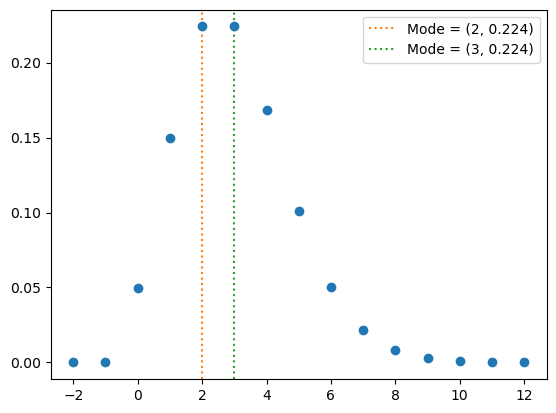

Probability of 0 gravitational events in a year: 0.05
Probability of 5 or more gravitational events in a year: 0.11


In [4]:
from scipy.stats import poisson

l = 3.2
mean = 3.2
std = np.sqrt(l)

g = np.arange(-2, 13)  # no. of gravitational events

## a)
poi = lambda x: poisson.pmf(x,3)
plt.axvline(2,ls = ':', color = 'tab:orange', label = f'Mode = {(2,round(poi(2),4))}')
plt.axvline(3,ls = ':', color = 'tab:green', label = f'Mode = {(3,round(poi(3),4))}')
plt.plot(g, poi(g), 'o')
plt.legend()
plt.show()

## b)
# no gravitational events means g = 0

print(f'Probability of 0 gravitational events in a year: {poi(0):.2f}')

## c)
# use poisson.cdf for p(g > 5)
prob = 1 - poisson.cdf(5,mean)
print(f'Probability of 5 or more gravitational events in a year: {prob:.2f}')

Question 5
==========

Assume 3 variables measured, given:

$$
(x_1,x_2,x_3) = \begin{bmatrix}
-1.9 & 2.7 & 29.7\\
-2.2 & 26.5 & 31.8\\
7.1 & 5.8 & 30.8\\
3.3 & 6.3 & 32.0
\end{bmatrix}
$$

a)
--
To calculate the covariance matrix, transpose this matrix so $x_1,x_2,x_3$ vectors are row vectors. Using the numpy.cov() function gives the matrix, which is printed out below.

b)
--
To calculate the correlation matrix, numpy.corrcoef() can be used. The answer is printed below.

In [5]:
x = np.array([[-1.9,2.7,29.7],
            [-2.2,26.5,31.8],
            [7.1,5.8,30.8,],
            [3.3,6.3,32.0]]).T
#print(x)
## a)
cov_x = np.cov(x)
print('Covariace matrix:')
print(cov_x)
## b)
corr_x = np.corrcoef(x)
print()
print(f'Correlation matrix:')
print(corr_x)

Covariace matrix:
[[ 19.9425     -22.16916667   0.70583333]
 [-22.16916667 118.81583333   6.5775    ]
 [  0.70583333   6.5775       1.11583333]]

Correlation matrix:
[[ 1.         -0.45543081  0.14962794]
 [-0.45543081  1.          0.57124713]
 [ 0.14962794  0.57124713  1.        ]]


Question 6
==========

Let $x$ be a vector of numbers of $N$ length, and the Rosenbrock function be a function of 1D array input with an 1D array output.

a)
--
To find the miniumum of a 5D Rosenbrock function, have to create a 5D object. This is done by meshgrid of 5 vectors to create an object of size $x = (5,N,N,N,N,N)$, where $N=11$ was selected. However this cannot be inputted straight into Rosenbrock, so it needs to be flattened, i.e. a matrix of size $\theta = (5, 11^5)$. This contains vectors of $N^5$ dimension information. Straighten this out as well and input into the Rosenbrock function and minimise. Only issue with this is $N$ has to be small for reasonable computation. 

After a brief look at Wikipedia, perhaps this was the wrong approach. Continue from the initial understanding that $N$ determines the dimension of the Rosenbrock function. Hence for $5D$, $N=5$. Apply the scipy.optimize.minimize function with a random initial guess $x_0^*$ and apply a while loop using the answer from the minimizer. The loop breaks after completing $101$ iterations, perhaps because since $N$ is small, the resolution again is too minimal for accurate minimization. 

The method found that for $5D$, the minimum is $f(x^*) \approx 5.312e^{-11}$ for the critical value $x^* = (0.9999992, 0.99999841, 0.99999368, 0.99998736)$. Expected for dimensions of $4 \leq N \leq 7$ the minima to be $x^*_{true} = (1,1,1,1,1)$. However if the guess is $x^*_{true}$, then the minimum is found immediately to be $f(x_0^*) = 0$. The minimizer does not get lost around the true minima.

b)
--
The only change is $N=7$. Keep the guess $x_0^* = (1,1,1,1,1,1,1)$ gives the minima again $f(x_0^*) = 0$. Now with the random guess, the minimizer seems to get stuck around $f(x^*) \approx 5.567e^{-11}$ for $x^* = (0.99999979,0.99999958,0.99999917,0.99999837,0.99999677,0.99999356,0.99998711)$. 

Upon using the Differential Evolution method however, the global minima is found, exact and without issue for both 5D and 7D. This did not take any initial guesses, but it did need bounds. For all dimensions throughout, the bounds were $x \in [-1,1]$.

In [6]:
## scrapped, unable to continue since N is too small for valid minimisation. Resolution is bad
## also I don't know if this is what the question was asking as well

# n_dim = 5
# N = 11
# x_grid = np.linspace(-1, 1, N)
# X_grid = np.meshgrid(*[x_grid for i in range(n_dim)])

# print(f'Shape of X_grid: {np.shape(X_grid)}')

# # assign theta, where each row is a vector for the respective meshgrid
# theta = np.stack([x.flatten() for x in X_grid], axis=-1).T
# print(f'Shape of theta: {np.shape(theta)}')

# # check if implemented correctly
# print(f'All values correctly flattened: {all(theta[0] == X_grid[0].flatten())}')

# # input to the rosenbrock function for each vector
# r = rosen([theta])
# print(f'Shape of Rosen: {np.shape(r)}')

# now minimize along the vectors

In [7]:
from scipy.optimize import rosen, minimize, differential_evolution
np.random.seed(42)
N = 7
N = 5

# Initial guess for minimiser
guess = np.random.rand(N) - 1
#guess = np.ones(N)
print(f'Initial guess : {guess}')

# Run optimizer
result = minimize(rosen, guess) # run again from the last obtained x-values
tol = 1e-11 # tolerance for minima
i = 0
while result.fun > tol and i <= 100:
    result = minimize(rosen, result.x)
    i += 1

# Print results
print(f'Loop stopped at iteration: {i}')
print(f'f(x): {result.fun}')
print(f'x = {result.x}')
print()

# with diff. evo.
# 7D
results = differential_evolution(rosen, bounds=[(-1,1), (-1,1), (-1,1), (-1,1), (-1,1), (-1,1), (-1,1)])

# 5D
results = differential_evolution(rosen, bounds=[(-1,1), (-1,1), (-1,1), (-1,1), (-1,1)])

print(f'Using differntial evolution: {results.x}')

Initial guess : [-0.62545988 -0.04928569 -0.26800606 -0.40134152 -0.84398136]
Loop stopped at iteration: 101
f(x): 5.31202932062526e-11
x = [0.9999992  0.99999841 0.99999684 0.99999368 0.99998736]

Using differntial evolution: [1. 1. 1. 1. 1.]


Question 7
==========

a)
--
The dataset given contain $m_{\gamma \gamma}$. The model to fit on the histogram are the sum of the background and signal functions provided:

$$
model(m_{\gamma \gamma} ; \mu, \sigma, A, B) = A(a + bm_{\gamma \gamma} + cm_{\gamma \gamma}^2) + B\times Gauss(m_{\gamma \gamma};\mu,\sigma)
$$

Where $\mu$ is the mean, $\sigma$ is the standard deviation and two scaling parameters $A,B$. Assuming that the yields in each bin is Poisson-distributed, as in, the likelihood function is of the Poisson-distribution for each bin. For ease, take the log-Poisson distribution, and for the MLE, maximize this equation:

$$\frac{\partial}{\partial \lambda}\ln(\mathcal{L}(k;\lambda)) = \frac{\partial}{\partial \lambda}(k\ln(\lambda) - \lambda - \lambda(k!))$$
$$\implies 0 = k/\lambda - 1$$
$$\therefore \lambda = k$$

Which states that the mean of each bin is the number of counts within that bin. Likewise, as $\sqrt(\lambda) = \sigma$, these values are the MLE of the standard deviation as well. However this does not describe the overall trend across all bins. The likelihood function over all bins would be the product:

$$
\mathcal{L}(k;\lambda) = \prod_i \frac{\exp^{-\lambda_i}\lambda_i^{k_i}}{k_i!}, \ \ \ \ \lambda_i = b_i + s_i
$$

Where $b,s$ are the background and signal components respectively from the data. Hence, the MLE would be $\lambda = b + s = k$, where $k$ is the total counts within the bins. The same principle holds as before, with the error bars being proportional to the errors of each bin. Now, have to find the parameter values of $A,B$. Borrwing code from Chapter 6, the minimizer gives a result of $A=46.2,B=221.7$. However it does get stuck on $A = B = 50$ as well, which was the initial guess.

b)
--
Wilk's Theorem: for $B=0$, gives a profile log likelihood ratio (LLR) of $t_{\theta} = 11.1 > 6$ for the $\chi^2$ of $95\%$ Confidence Level with $2$ degrees of freedom. As the LLR is fairly close to the critical $\chi^2$ parameter but still is greater, the null hypothesis model $H_0$ is excluded. However this does not state that $H_1$ model is correct, this needs to still be tested.

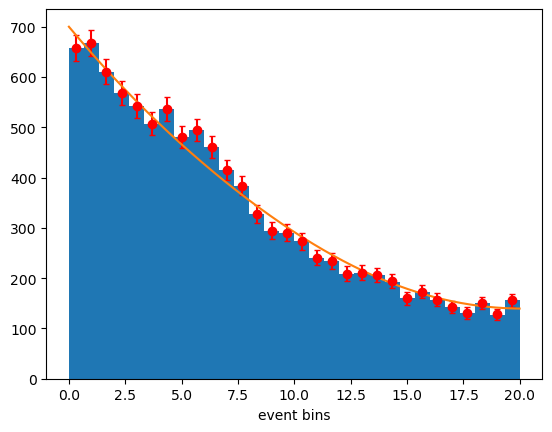

In [8]:
m = np.loadtxt('exam_dataset_2025.txt') # load data
N = len(m)
a = 15
b = -1.2
c = 0.03

mean = m.mean()
std = m.std() # 0.5 to visualise bump

def background(m, A=1):
    return A*(a + b*m + c*m**2)

def sig(m, B=1):
    return B*norm.pdf(m, mean, std)

# filter out noise & find the parameters of A,B,mean,std via differential evolution to find MLE

def likelihood(m, A=1, B=1):
    return (background(m,A) + sig(m,B))    

# make a histogram of the LHC data with 30 bins
k, edges = np.histogram(m, bins=30, range=[0, 20])
bin_centres = (edges[:-1] + edges[1:]) / 2

plt.hist(m, bins=30)
plt.errorbar(bin_centres, k, yerr=np.sqrt(k), fmt="o", capsize=2, c="r")
plt.xlabel('event bins')
x = np.arange(0,20,0.01)
plt.plot(x,likelihood(x,46.2,221.7)) # A = B = 50 for scaling
plt.show()

In [9]:
# code borrowed from 6-hypothesis.ipynb

def minus_log_lhc_like(params):
    A, B = params
    sum = 0
    entries, edges = np.histogram(m, bins=30, range=[0, 20])
    # calculate bin centers
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    n = bin_centers.size
    for i in range(0, n):
        # Calcuate the expectation for the signal+background model
        b = background(bin_centers[i], A)
        s = sig(bin_centers[i], B)
        lambda_i = s + b
        k_i = entries[i]
        # scipy.special.gammaln(k_i+1) is a trick to get log(k_i!)
        sum += scipy.stats.poisson.logpmf(k_i, lambda_i)
        # print(k_i,lambda_i,scipy.stats.poisson.logpmf(k_i,lambda_i))
    return -1 * sum

# profile log likelihood

def llr(params, A_max, B_max):
    A, B = params
    sum = 0
    entries, edges = np.histogram(m, bins=30, range=[0, 20])
    # calculate bin centers
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    n = bin_centers.size
    for i in range(0, n):
        # Calcuate the expectation for the signal+background model
        b = background(bin_centers[i], A)
        s = sig(bin_centers[i], B)
        lambda_i = s + b
        b_max = background(bin_centers[i], A_max)
        s_max = sig(bin_centers[i], B_max)
        lambda_max_i = s_max + b_max
        k_i = entries[i]
        sum += k_i * (np.log(lambda_i) - np.log(lambda_max_i)) - (
            lambda_i - lambda_max_i
        )
    return -2 * sum



In [10]:
import scipy
import scipy.optimize as opt

x_initial = np.array([70, 50])
results = opt.minimize(minus_log_lhc_like, x_initial, bounds=((0, 100), (0, 300)))

print(f"The resultant parameters are: A = {results.x[0]:.1f}, B = {results.x[1]:.1f}")

max_params = results.x

LLR = llr((max_params[0], 0), *max_params)
print(f"The value of the profile log likelihood ratio is {LLR:.1f}")

# compare the the chi-squared number
crit_chi2 = scipy.stats.chi2(2).ppf(0.95)
print(f"The critical chi2 value for 2 dof at 95% CL is {crit_chi2:.1f}")

The resultant parameters are: A = 46.2, B = 221.7
The value of the profile log likelihood ratio is 11.1
The critical chi2 value for 2 dof at 95% CL is 6.0


Question 8
==========

a)
--
The suitable probability distribution for more than two discrete outcomes would be the Multinomial distribution. This allows modelling of the probability of counts for each side of a $k$-sided die rolled $n$ times. In this case, $n=100$, $k=5$.

b)
--
Assuming a flat prior, $P(\theta)=1/5$, since for a fair die each side is equally like to land. Use MCMC sampling to obtain 100,000 samples from the posterior, which is a product of the likelihood and prior. Then from this generalised posterior, from 5D down to 2D where the main focus is the ones and twos from the die, obtained via magrinal posteriors.

c)
--
Both methods are dependenton Bayes Theorem, where $P(\theta_i|D) \propto P(D|\theta_i)P(\theta_i), \ \ \ \ i = \mathbb{N}$, where $\theta_i$ is a set of parameters that describe the distribution. Such include $\mu,\sigma$.

The Maximum Posterior Estimate (MPE) is maximising the Posterior for each parameter, for a given prior distribuion, $P(\theta_i)$. This is done by taking the Marginal Posterior PDF for a select $\theta_j$:

$$
P(\theta_1|D) = \int P(\theta_j|D)d\theta_j, \ \ \ \ j = \{2,3,4,...\}
$$

Note that the best fit for parameters may be outside the peaks of each PDFs to agree with the other parameters.

The Maximum Likelihood Estimate (MLE) is maximising the likelihood function for each parameters, which would be the same as MPE for $P(\theta_i = 1)$. Conventionally, the natual log:
$$
\frac{\partial}{\partial \theta_i} \ln{\mathcal{L}} = 0,\ \ \ \ i = \mathbb{N}
$$

d)
--
From given roll outcomes, given the observed modes from part b), there is slight skewage for rolling ones whereas rolling twos is more Gaussian distributed. As $1/5 = 0.2$, it makes some sense that for rolling ones the graph would be slightly skewed on rolling less ones on average. Since the twos however is much larger than expected, the distribution is unexpectedly more normal than rolling ones.

e)
--
The die is biased, as there should be equal probability of rolling a one compared to a two. This is not the case here. And this is considering only rolling ones and twos compared to the other sides. This can be further determined by constructing this test via Markov Chain Monte Carlo sampling for rolling threes, fours and fives, and analyzing if the 1D Marginal Posteriors are normal or not. Since there are five sides and you have the ability to test against two sides, there are 10 total possible contour-histogram plots to analyze over against all possible rolls.

Non-statistically, assuming for a biased die to roll more favourable on one side, the mass would not be uniformly distributed. A lax method is by placing the die on water, if it is able to float. The less dense side would rise to the top, showing a nonuniformly distributed mass.

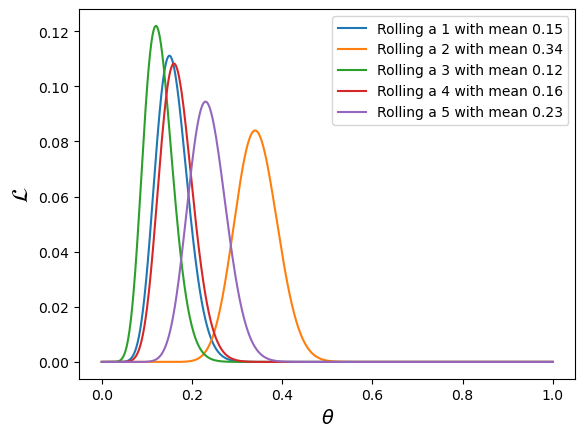

In [11]:
from scipy.stats import binom, multinomial
n = 100 # number of rolls

# create binomial likelihood function as a function of D, where D = # of times it landed on a number
def likelihood(D,theta):
    return binom(n, theta).pmf(D)

# create a plot to show these binomial functions with given roll counts, along with their means
counts = np.array([15,34,12,16,23])
probs = counts/n
theta = np.linspace(0, 1, 1000)
plt.figure()

for i in range(5):
    plt.plot(theta, likelihood(counts[i],theta), label= f'Rolling a {i+1} with mean {probs[i]}')

plt.xlabel(r"$\theta$", fontsize=14)
plt.ylabel(r"$\mathcal{L}$", fontsize=16)
plt.legend()
plt.show()

(50, 50)
(50, 50)


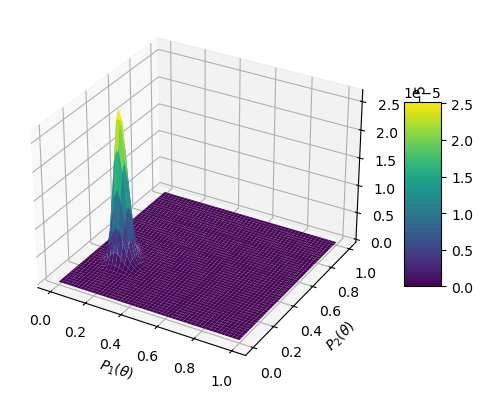

In [12]:
# create multinomial likelihood distribution function
# multinominal(n,p).pmf(x,n,p)
# n = number of trials = 100
# p = probability of trails, i.e. 15/100 for ones
# x = index of object, so x = rolls of (1,2,3,4,5)

# Compute likelihood (PMF value), which is the multinominal distribution
# p would be the vector input, as it would be evaluated over the grid for possible
# probabilities between 0 and 1
from scipy.stats import binom, multinomial
from matplotlib import cm

# def likelihood(p1,p2):
#     p_rest = int((1-p1-p2)/3)            # equally distribute the probabilities for the three other rolls
#     p = [p1,p2,p_rest,p_rest,p_rest]#
#     counts = 100*np.array(p)          # 

#     # print('Probabilities:')
#     # print(p)
#     # print()
#     # print('Number of rolls per face:')
#     # print(counts)
#     return multinomial.pmf(counts,n,p=p)

def likelihood(p1, p2):
    p_rest = (1 - p1 - p2) / 3
    if p_rest < 0:
        return 0
    p = [p1, p2, p_rest, p_rest, p_rest]
    if np.any(np.array(p) < 0) or not np.isclose(sum(p), 1):
        return 0
    counts = np.array([15, 34, 12, 16, 23])  # fixed data
    return multinomial.pmf(counts, n=sum(counts), p=p)

likelihood = np.vectorize(likelihood)    # doesn't show graph else

# def likelihood(theta):
#     mean1 = np.array([5.0, 5.0, 5.0, 5.0])
#     sigma1 = np.array(np.diag([0.2, 0.1, 0.4, 0.6]))
#     mean2 = np.array([7.0, 7.0, 7.0, 7.0])
#     sigma2 = np.array(np.diag([1.0, 1.0, 1.0, 1.0]))
#     return multinominal.pdf(
#         theta, mean1, sigma1
#     ) + multinominal.pdf(theta, mean2, sigma2)


def posterior(x1, x2):
    if x1 < 0 or x1 > 1 or x2 < 0 or x2 > 1:
        return 0
    else:
        return likelihood(x1, x2) * 1

posterior = np.vectorize(posterior)

x1 = np.linspace(0,1)
X, Y = np.meshgrid(x1, x1)  # grid of points
Z = likelihood(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel(r"$P_1(\theta)$")
plt.ylabel(r"$P_2(\theta)$")

## check dimensionality
print(np.shape(Z))
print(np.shape(X))

In [13]:
## define functions required
## copy sampler with resolution & initial mean estimations
## copy histogram surface plot

from scipy import stats
def sampler(nsamples):
    theta = np.array([probs[0], probs[1]])    # the estimate location. For probabilities, let it be the known means of rolling ones and twos
    sigma = np.diag([0.001, 0.001])           # increase the resoluion

    x1_samples = np.zeros(nsamples + 1)
    x2_samples = np.zeros(nsamples + 1)
    samples = np.zeros((nsamples + 1, 2), float)
    samples[0] = theta

    for i in range(nsamples):
        theta_prime = stats.multivariate_normal(theta, sigma).rvs()
        a = min(posterior(*theta_prime) / (posterior(*theta) + 1e-20 ), 1)
        if np.random.rand() < a:
            theta = theta_prime
        samples[i + 1] = theta

    return samples

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, MaxNLocator
from scipy.interpolate import make_interp_spline


def makeHistogramPlot(
    xdata,
    ydata,
    xlims=None,
    ylims=None,
    nxbins=50,
    nybins=50,
    nbins=50,
    style="hist",
    width=9,
    height=9,
    ratio=4,
):
    # Define the x and y data
    x = xdata
    y = ydata
    # Set up default x and y limits

    if xlims == None:
        xlims = [min(x), max(x)]
    if ylims == None:
        ylims = [min(y), max(y)]
    # Set up your x and y labels
    xlabel = "$x_1$"
    ylabel = "$x_2$"
    mtitle = ""
    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left + width + 0.02
    # Set up the size of the figure
    fig = plt.figure(figsize=(9, 9))
    gs = fig.add_gridspec(
        2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0, wspace=0
    )
    ax = gs.subplots(
        sharex="col",
        sharey="row",
    )
    fig.delaxes(ax[0, 1])

    # Make the three plots
    axData = ax[1, 0]  # plt.axes(rect_data)  # main plot
    axHistx = ax[0, 0]  # plt.axes(rect_histx)  # x histogram
    axHisty = ax[1, 1]  # plt.axes(rect_histy)  # y histogram

    # for ax in [axData,  axHistx, axHisty]:
    #     ax.label_outer()

    axHistx.set_axis_off()
    axHisty.set_axis_off()
    # Remove the inner axes numbers of the histograms
    # nullfmt = NullFormatter()
    # axHistx.xaxis.set_major_formatter(nullfmt)
    # axHisty.yaxis.set_major_formatter(nullfmt)
    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)
    # Make the ’main’ plot
    xbins = np.linspace(start=xmin, stop=xmax, num=nxbins + 1, endpoint=True)
    ybins = np.linspace(start=ymin, stop=ymax, num=nybins + 1, endpoint=True)
    xcenter = (xbins[1:] + xbins[:-1]) / 2.0
    ycenter = (ybins[1:] + ybins[:-1]) / 2.0
    H, xedges, yedges = np.histogram2d(y, x, bins=(ybins, xbins))
    X = xcenter
    Y = ycenter
    Z = H
    # Plot the temperature data
    cax = axData.imshow(
        H,
        extent=[xmin, xmax, ymin, ymax],
        interpolation="nearest",
        origin="lower",
        aspect="auto",
    )

    # Plot the axes labels
    axData.set_xlabel(xlabel, fontsize=25)
    axData.set_ylabel(ylabel, fontsize=25)
    # Make the tickmarks pretty
    ticklabels = axData.get_xticklabels()
    for label in ticklabels:
        label.set_fontsize(18)
        label.set_family("serif")
        ticklabels = axData.get_yticklabels()
    for label in ticklabels:
        label.set_fontsize(18)
        label.set_family("serif")
    # Set up the plot limits
    axData.set_xlim(xlims)
    axData.set_ylim(ylims)
    # Set up the histogram bins
    xbins = np.linspace(xmin, xmax, nbins + 1, endpoint=True)
    ybins = np.linspace(ymin, ymax, nbins + 1, endpoint=True)
    # Plot the histograms

    xHist, xEdges = np.histogram(x, bins=xbins, density=True)
    yHist, yEdges = np.histogram(y, bins=ybins, density=True)

    # axHistx.hist(x, bins=xbins, color="blue", fill=False, density=True, histtype="step")
    # axHisty.hist(
    #     y, bins=ybins, orientation="horizontal", color="red", fill=False, density=True, histtype="step"
    # )
    if style == "step":
        axHistx.stairs(xHist, xEdges, baseline=None, linewidth=2)
        axHisty.stairs(
            yHist, yEdges, orientation="horizontal", baseline=None, linewidth=2
        )
    elif style == "hist":
        xCentres = (xEdges[1:] + xEdges[:-1]) / 2
        yCentres = (yEdges[1:] + yEdges[:-1]) / 2
        axHistx.bar(xCentres, xHist, xEdges[1:] - xEdges[:-1], fill=None)
        axHisty.barh(
            yCentres, yHist, yEdges[1:] - yEdges[:-1], fill=None
        )  # , orientation="horizontal"

    elif style == "smooth":
        xCentres = (xEdges[1:] + xEdges[:-1]) / 2
        yCentres = (yEdges[1:] + yEdges[:-1]) / 2
        xSmooth = make_interp_spline(xCentres, xHist)
        ySmooth = make_interp_spline(yCentres, yHist)
        xLin = np.linspace(min(xCentres), max(xCentres), 501, endpoint=True)
        yLin = np.linspace(min(yCentres), max(yCentres), 501, endpoint=True)
        axHistx.plot(xLin, xSmooth(xLin))
        axHisty.plot(
            ySmooth(yLin),
            yLin,
        )  # , orientation="horizontal"

    axHistx.set_ylim((0, 1.1 * max(xHist)))
    axHisty.set_xlim((0, 1.1 * max(yHist)))
    # Make the tickmarks pretty
    ticklabels = axData.get_yticklabels()
    for label in ticklabels:
        label.set_fontsize(12)
        label.set_family("serif")
    # Make the tickmarks pretty
    ticklabels = axData.get_xticklabels()
    for label in ticklabels:
        label.set_fontsize(12)
        label.set_family("serif")
    # Cool trick that changes the number of tickmarks for the histogram axes
    axData.xaxis.set_major_locator(MaxNLocator(5, prune="both"))
    axData.yaxis.set_major_locator(MaxNLocator(5, prune="both"))

    print(yCentres[-1] + (yEdges[1:] - yEdges[:-1])[-1] / 2)
    print(xCentres[-1] + (xEdges[1:] - xEdges[:-1])[-1] / 2)

    fig.tight_layout()
    return fig

0.5416880333973184
0.32918785875945655


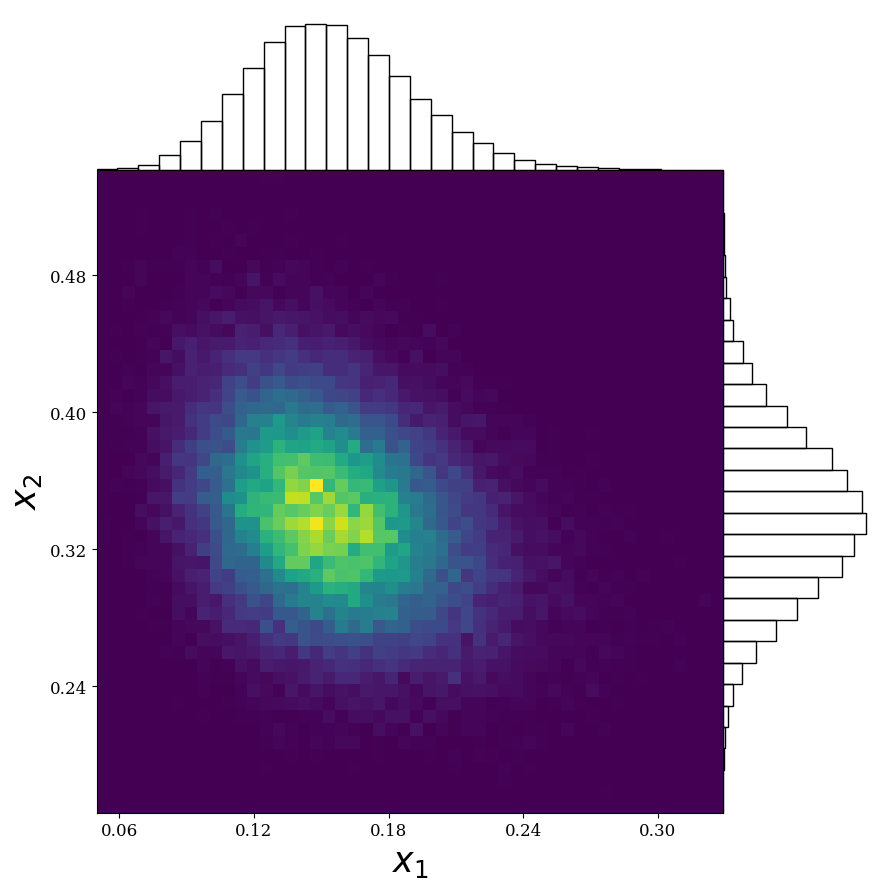

In [14]:
samples = sampler(10**5)
burnedinsamples = 1000

fig = makeHistogramPlot(
    samples[burnedinsamples:, 0],
    samples[burnedinsamples:, 1],
    nxbins=50,
    nybins=50,
    nbins=30,
)

In [15]:
### Following code is scapped

# from numpy import random
# # define a rolls vector for each side of the die and the probability of landing upon them
# # 'borrow' the function from 5-parameter_inference and create lists
# # for different probabilities of rolling given side
# # use probs-numpy array

# def flip(p):
#     return "H" if random.random() < p else "T"

# N = 10**5    # number of samples

# roll_1 = [flip(probs[0]) for i in range(N)]
# roll_2 = [flip(probs[1]) for i in range(N)]
# print("Number of ones is: ", roll_1.count("H"))
# print("Number of twos is: ", roll_2.count("H"))

In [16]:
# # for probabilities of rolling a one

# naccepted = 0
# nsamples = 10000
# samples = np.zeros(nsamples + 1)
# sigma = 0.3    # resolution

# # nsamples = number of requested samples to obtain
# # theta = the probability mean 


# def sampler(nsamples):
#     theta = np.array([5.0, 5.0])
#     sigma = np.diag([1.0, 1.0])

#     x1_samples = np.zeros(nsamples + 1)
#     x2_samples = np.zeros(nsamples + 1)
#     samples = np.zeros((nsamples + 1, 2), float)
#     samples[0] = theta

#     for i in range(nsamples):
#         theta_prime = stats.multivariate_normal(theta, sigma).rvs()
#         a = min(posterior(*theta_prime) / posterior(*theta), 1)
#         if np.random.rand() < a:
#             theta = theta_prime
#         samples[i + 1] = theta

#     return samples


In [17]:
# # note that the grid is x in [0,1] and y in [0,1]
# # Hence, rest of the probabilites for rolls of threes, fours and fives would be distributed equally
# # to account for p to be a total of 1

# samples = sampler(10**5,probs[0])

# burnedinsamples = 1000
# fig, ax = plt.subplots()
# plot_hist = ax.hist2d(
#     samples[burnedinsamples:, 0], samples[burnedinsamples:, 1], bins=100, density=True
# )
# cb = plt.colorbar(plot_hist[3], ax=ax)

In [18]:
# # create a contour plot for the MCMC sampling
# # first the posterior which is a product of prior and likelihood
# # recall prior = 1, so posterior = likelihood

# theta, theta = np.meshgrid(theta,theta)

# def likelihood(x1, x2):
#     return likelihood(rolls[0],x1)
    
# # the function takes number of samples to collect
# # and select a theta_0 for sampling. 
# # For this instance, theta_0 for rollings ones

# def posterior(x1, x2):
#     if x1 < 0 or x1 > 10 or x2 < 0 or x2 > 10:
#         return 0
#     else:
#         return likelihood(x1, x2) * 1.0


# def sampler(nsamples):
#     theta = np.array([5.0, 5.0])
#     sigma = np.diag([1.0, 1.0])

#     x1_samples = np.zeros(nsamples + 1)
#     x2_samples = np.zeros(nsamples + 1)
#     samples = np.zeros((nsamples + 1, 2), float)
#     samples[0] = theta

#     for i in range(nsamples):
#         theta_prime = stats.multivariate_normal(theta, sigma).rvs()
#         a = min(posterior(*theta_prime) / posterior(*theta), 1)
#         if np.random.rand() < a:
#             theta = theta_prime
#         samples[i + 1] = theta

#     return samples